In [11]:
import rapids_singlecell as rsc
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import os
import cupyx as cpx
import scipy

In [14]:
adata = ad.read_h5ad('adata.h5ad')

rsc.get.anndata_to_GPU(adata)

'''sp_mat = scipy.sparse.csr_matrix(adata.X)
adata.X = cpx.scipy.sparse.csr_matrix(sp_mat)'''  # moves `.X` to the GPU

/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


neighborhood done!
umap done!
leiden done!


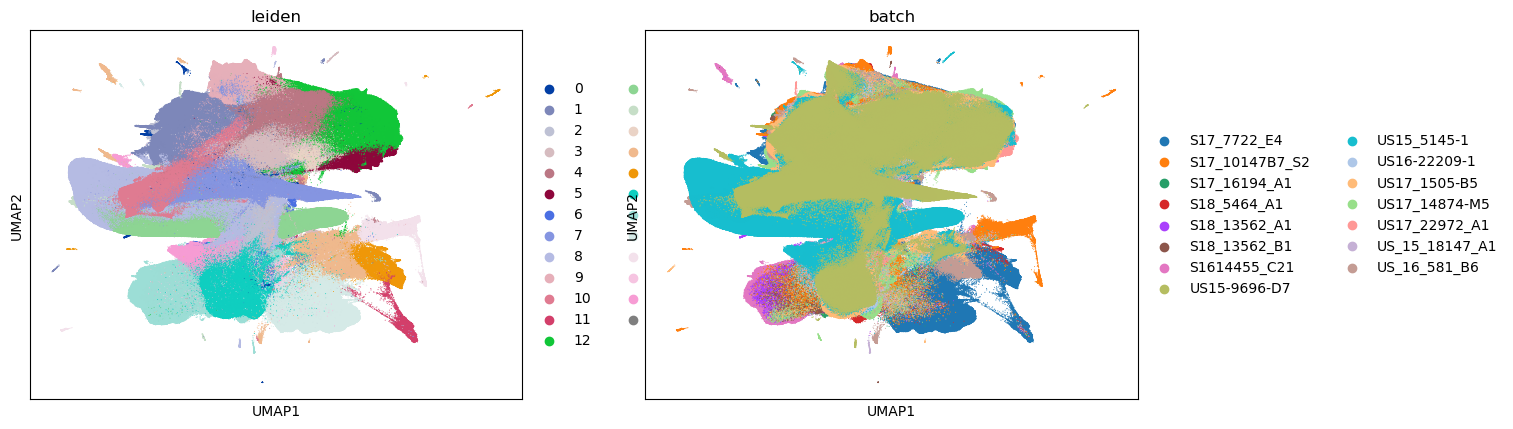

In [16]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
rsc.pp.neighbors(adata, n_neighbors=30, use_rep='X_pca')
print('neighborhood done!')
rsc.tl.umap(adata)
print('umap done!')
rsc.tl.leiden(adata, resolution=0.5)
print('leiden done!')
sc.pl.umap(adata, color=['leiden', 'batch'], size=2)

In [17]:
rsc.tl.leiden(adata, resolution=2, key_added='leiden_2')
rsc.tl.leiden(adata, resolution=1, key_added='leiden_1')

In [ ]:
# sc.pl.umap(adata, color=['leiden_1', 'leiden_2', 'batch'], size=3)
adata.write_h5ad('adata.h5ad')